## Alcohol consumption on the attractiveness of members of the opposite Gender ##


In [2]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import numpy as np
import matplotlib.pyplot as plt


the data contains the following columns:
- **Gender**:  the Gender (Categorical/ Male, Female)
- **Alcohol**: drink level (Categorical: 0,2,4).
- **Attractiveness**: Numeric from 1 to 100.. 


In [7]:
# import attractiveness data
data = pd.read_csv("Alcohol_effects.csv", sep =';')
data.head()

,Gender,Alcohol,Attractiveness
0,Female,0,65
1,Female,0,70
2,Female,0,60
3,Female,0,60
4,Female,0,60


In [8]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          48 non-null     object
 1   Alcohol         48 non-null     int64 
 2   Attractiveness  48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
# convert 'Alcohol' into categorical values
data['Alcohol'] =data['Alcohol'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          48 non-null     object  
 1   Alcohol         48 non-null     category
 2   Attractiveness  48 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 1.1+ KB


In [11]:
# lets calucted the means for each consumption of Alcohol

mean_co = data.groupby('Alcohol').mean()
mean_co

,Attractiveness
Alcohol,
0,63.7500
2,64.6875
4,46.5625


We first do an ANOVA test without taking into account the gender variable.
  We perform a one-way ANOVA using 'Attractiveness' and 'Alcohol'. Average attractiveness for each level of alcohol consumption   is 0  mean =  63.7500,
     2 mean = 64.6875, 
     4 mean = 46.5625.
  
Attractiveness increases as Alcohol is drank from 0 to 2,
but decreases as Alcohol is drank from 2 to 4. 
In other words, drinking beer causes its attractiveness to decrease. 



### Anova Test

In [12]:
model = smf.ols(formula = "Attractiveness ~ Alcohol", data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Attractiveness   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     13.31
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           2.88e-05
Time:                        12:02:19   Log-Likelihood:                -182.48
No. Observations:                  48   AIC:                             371.0
Df Residuals:                      45   BIC:                             376.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.7500      2.797     22.789   

ANOVA Result :

F statistic = 13.31 

p-value = 2.88e-05 

indicating a rejection of the null hypothesis that there is no difference in gravitationalities for different levels of alcohol consumption.

There is ample evidence to suggest that different levels of alcohol consumption result in different average attractiveness ratings in conversation partners.

Since we reject the null hypothesis, 
a post hoc test is conducted as follows. We can see that the mean attractiveness of 0 pint vs 2 pint has no difference, but mean attractiveness of 0 pint vs 4 pints, 2 pints vs 4 pints are significantly different.

In [13]:
 mc = multi.MultiComparison(data['Attractiveness'],data['Alcohol'])
print(mc.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      2   0.9375 0.9695  -8.6507 10.5257  False
     0      4 -17.1875 0.0002 -26.7757 -7.5993   True
     2      4  -18.125 0.0001 -27.7132 -8.5368   True
-----------------------------------------------------


We now consider 'Gender' as the potential moderator that may affect the association between attractiveness and alcohol consumption. In other words, we run an ANOVA on "attractiveness" and "Alcohol" for different gender. 

We divide the data into **MALE** and **FEMALE**

In [14]:
data_male = data[(data['Gender'] == 'Male')]
data_female = data[(data['Gender'] == 'Female')]

### Anova test for Male

In [15]:
act_mean_male = data_male.groupby("Alcohol").mean()
print(act_mean_male)

         Attractiveness
Alcohol                
0                66.875
2                66.875
4                35.625


In [17]:
model_m = smf.ols(formula = "Attractiveness ~ Alcohol", data = data_male).fit()
>>> print(model_m.summary())

                            OLS Regression Results                            
Dep. Variable:         Attractiveness   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     20.52
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.15e-05
Time:                        12:10:10   Log-Likelihood:                -90.576
No. Observations:                  24   AIC:                             187.2
Df Residuals:                      21   BIC:                             190.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.8750      3.983     16.789   

The **ANOVA** result for Male:

F-statistic= 20.52 

p-value = 1.15e-05 

indicating different levels of alcohol consumption yields a different mean attractiveness rating in conversation partners for males

### Anova test for Female

In [18]:
act_mean_female = data_female.groupby("Alcohol").mean()
print(act_mean_female)

         Attractiveness
Alcohol                
0                60.625
2                62.500
4                57.500


In [19]:
model_f = smf.ols(formula = "Attractiveness ~ Alcohol", data = data_female).fit()
>>> print(model_f.summary())

                            OLS Regression Results                            
Dep. Variable:         Attractiveness   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.304
Date:                Wed, 28 Dec 2022   Prob (F-statistic):              0.292
Time:                        12:12:47   Log-Likelihood:                -76.457
No. Observations:                  24   AIC:                             158.9
Df Residuals:                      21   BIC:                             162.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       60.6250      2.212     27.410   

the ANOVA result for Female : 

F-statistic= 1.304

p-value = 0.292

 there is no difference in attractiveness rating for different alcohol consumption for females. 
 
 In summary, the average attractiveness for females for the three levels of alcohol is almost the same. 
 Nevertheless, for males the difference in average attractiveness for the three levels is quite different. This indicates gender is a moderator. 

### plot the Moderator

Let's  see the moderator (interaction) "gender" with "Alcohol",
we look at the interaction graph which confirms the existness of interaction between "Gender" and "Alchohl".

Text(0.5, 1.0, 'Mean plot of attractiveness for Male and Female')

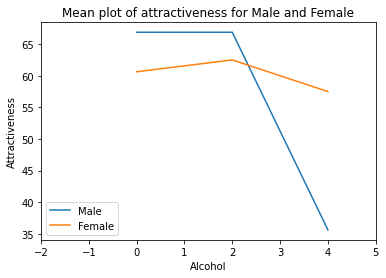

In [21]:
p1, = plt.plot(np.array([0,2,4]), act_mean_male.Attractiveness.values)
p2, = plt.plot(np.array([0,2,4]), act_mean_female.Attractiveness.values)
plt.xlim([-2,5])
plt.legend([p1,p2],['Male','Female'],loc = 'lower left')
plt.xlabel("Alcohol")
plt.ylabel("Attractiveness")
plt.title("Mean plot of attractiveness for Male and Female")